# [Lab Session 3](fourier.ipynb)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


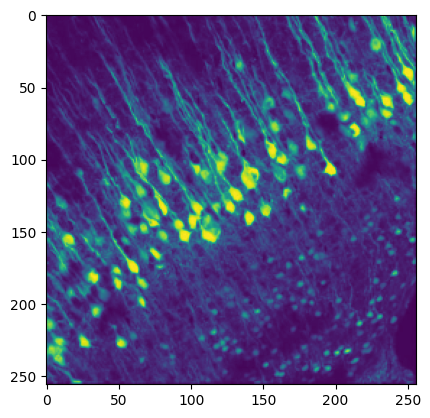

In [30]:
img = plt.imread('data/cells.png')
cell_img = resize(img, (256, 256))
plt.imshow(cell_img)


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [31]:
cell_ft = np.fft.fft2(cell_img)


**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [32]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)


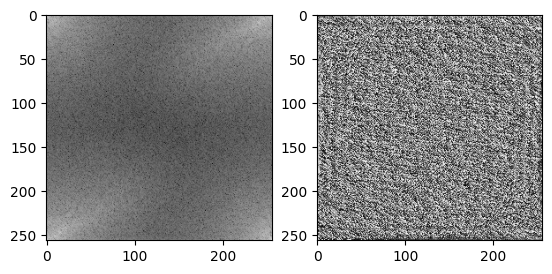

In [33]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


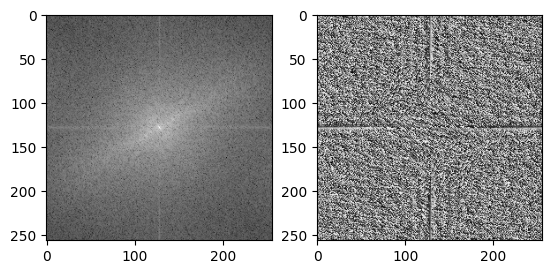

In [39]:
shift = np.fft.fftshift(cell_ft)

amplitude_cell = np.abs(shift)
phase_cell = np.angle(shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_cell), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_cell, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


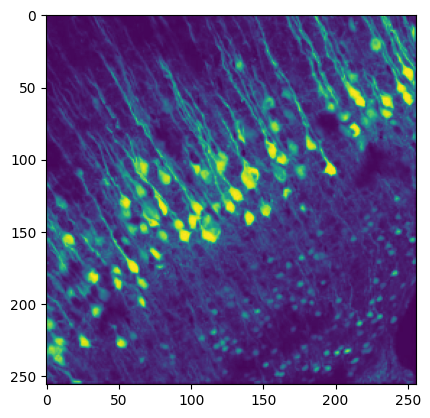

In [40]:
inverse_shift = np.fft.ifftshift(shift)
inverse_fft = np.fft.ifft2(inverse_shift)
plt.imshow(inverse_fft.real)

---


**[Task 2 (a).]()** Load the brain CT image.


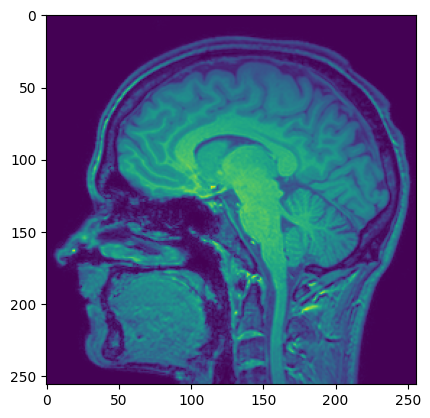

In [41]:
brain = plt.imread("data/brain_ct.png")
plt.imshow(brain)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


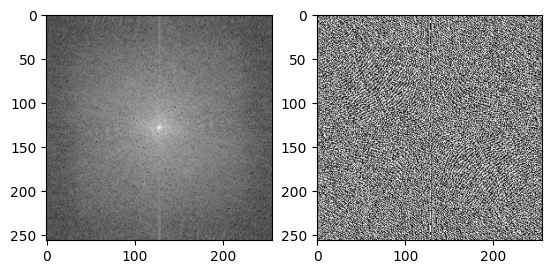

In [42]:
brain_ft = np.fft.fft2(brain)
brain_shift = np.fft.ifftshift(brain_ft)

amplitude_brain = np.abs(brain_shift)
phase_brain = np.angle(brain_shift)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_brain), "gray")
plt.subplot(1, 2, 2)
plt.imshow(phase_brain, "gray")

In [43]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


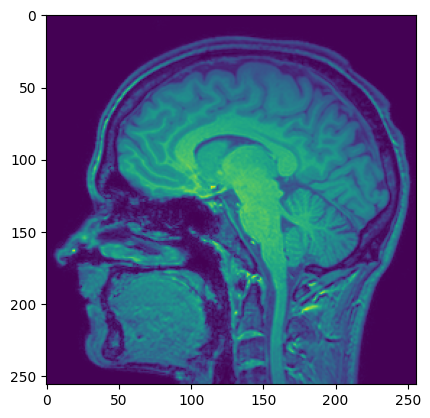

In [44]:
cart = to_complex_array(amplitude_brain, phase_brain)

inverse_brain = np.fft.ifftshift(cart)
inverse_brainfft = np.fft.ifft2(inverse_brain)
plt.imshow(inverse_brainfft.real)


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


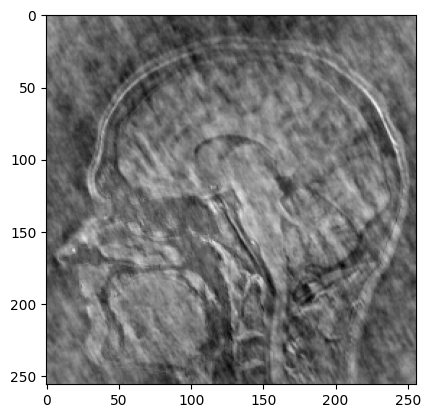

In [45]:
mix = to_complex_array(amplitude_cell, phase_brain)

inverse_mix = np.fft.ifftshift(mix)
inverse_mixfft = np.fft.ifft2(inverse_mix)
plt.imshow(inverse_mixfft.real,cmap="grey")

---


**[Task 3 (a).]()** Create a lowpass filter mask.


123


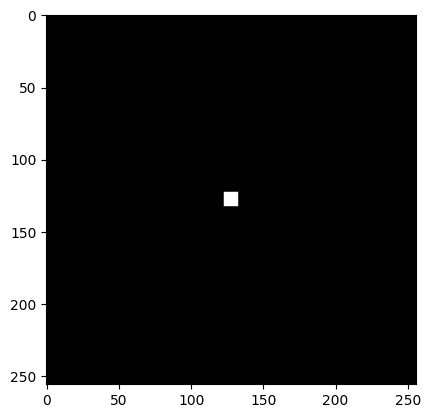

In [46]:
filter_window_size = 10

# Create a 256x256 array filled with zeros
large_square = np.zeros((256, 256), dtype=np.uint8)

# Calculate the starting index for the small square (center of the large square)
start_row = (large_square.shape[0] - filter_window_size) // 2
start_col = (large_square.shape[1] - filter_window_size) // 2
print(start_row)
# Insert the small square (50x50 array of ones) in the center of the large square
large_square[start_row:start_row + filter_window_size, start_col:start_col + filter_window_size] = 1

lowpass = large_square
# Now large_square has a small square of 1s in the middle
plt.imshow(lowpass, cmap = "grey")

**[Task 3 (b).]()** Create a highpass filter maks.


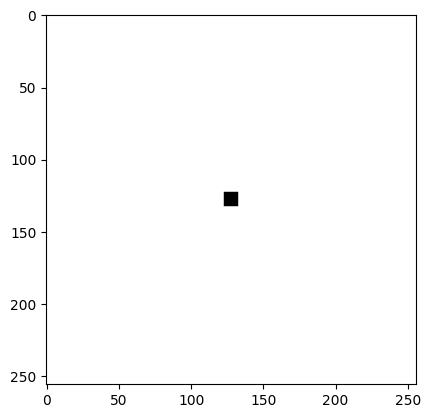

In [47]:
highpass = 1 - lowpass
plt.imshow(highpass, cmap = "grey")

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


/tmp/ipykernel_943/3984748247.py:6: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_amp), "gray")
/tmp/ipykernel_943/3984748247.py:8: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_amp), "gray")


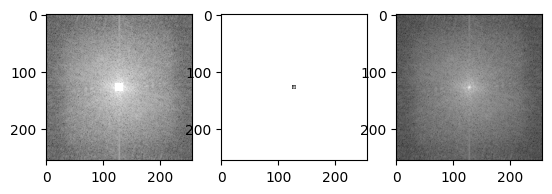

In [48]:
high_amp = highpass * amplitude_brain
low_amp = lowpass * amplitude_brain

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(np.log(high_amp), "gray")
plt.subplot(1, 3, 2)
plt.imshow(np.log(low_amp), "gray")
plt.subplot(1,3,3)
plt.imshow(np.log(amplitude_brain), "gray")

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


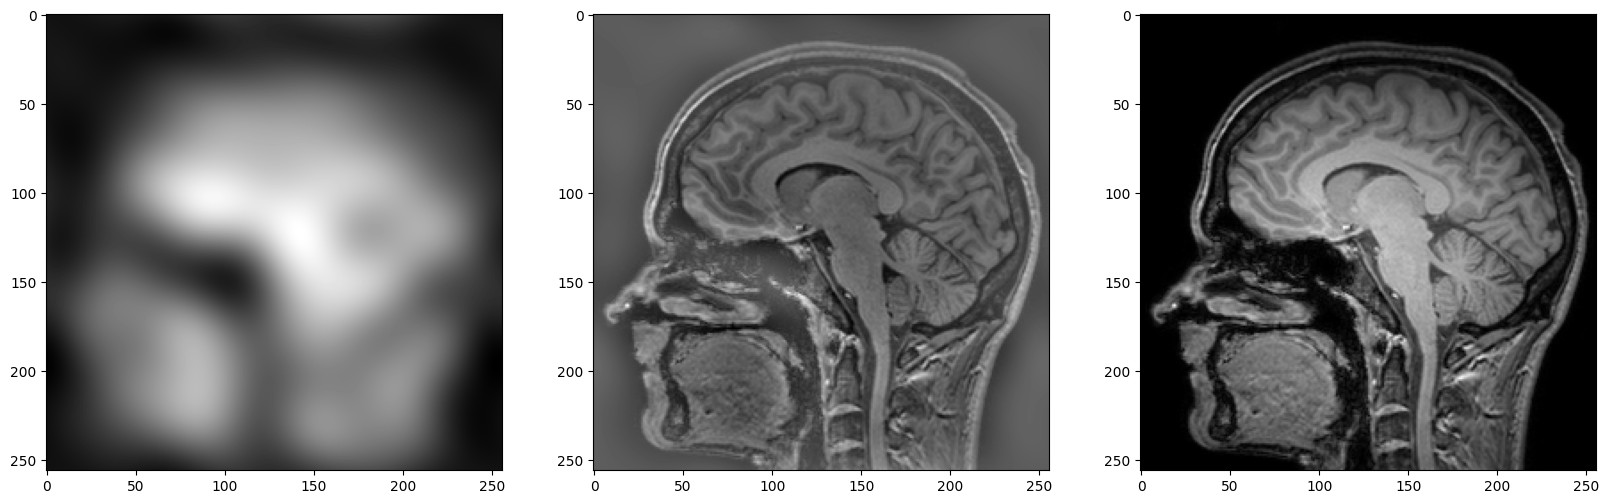

In [49]:
brain_merge_low = np.fft.ifft2(np.fft.ifftshift(to_complex_array(low_amp,phase_brain)))

brain_merge_high = np.fft.ifft2(np.fft.ifftshift(to_complex_array(high_amp,phase_brain)))

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)
plt.imshow(brain_merge_low.real, cmap = "gray")
plt.subplot(1, 3, 2)
plt.imshow(brain_merge_high.real, cmap = "gray")
plt.subplot(1, 3, 3)
plt.imshow(brain.real, cmap = "gray")


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


In [101]:
import math
def dft (img):
    matrix = np.zeros(img.shape, dtype=complex)
    m,n = img.shape
    for u in range (m):
        for v in range (n):
            wert = 0
            for x in range(m):
                for y in range (n):
                    wert += img[x,y] * math.e**(math.pi * -2j * ((u*x)/m + (v*y)/n))
            matrix[u,v]= (1/(m*n)) * wert
    return(matrix)


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [104]:
import math
def idft (img):
    matrix_i = np.zeros(img.shape, dtype=complex)
    m,n = img.shape
    for u in range (m):
        for v in range (n):
            wert = 0
            for x in range(m):
                for y in range (n):
                    wert += img[x,y] * math.e**(math.pi * 2j * ((u*x)/m + (v*y)/n))
            matrix_i[u,v] = (1/(m*n)) * wert 
    return(matrix_i)
        

Due to high computational costs, we need to resize the image.


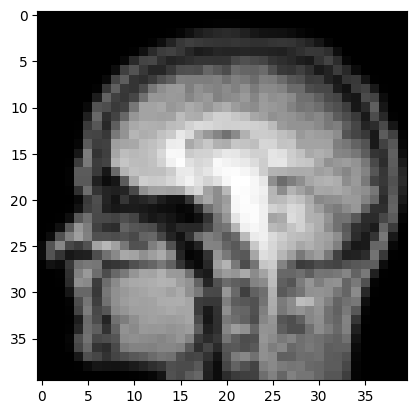

In [105]:
test_img = resize(brain, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


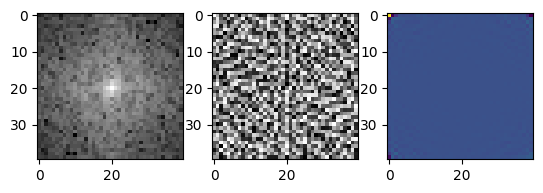

In [106]:
dft_test = dft(test_img)
test_shift = np.fft.fftshift(dft_test)
amplitude_dftbrain = np.abs(test_shift)
phase_dftbrain = np.angle(test_shift)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(np.log(amplitude_dftbrain), "grey")
plt.subplot(1, 3, 2)
plt.imshow(phase_dftbrain,"grey")
plt.subplot(1, 3, 3)
plt.imshow(dft_test.real,)

**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


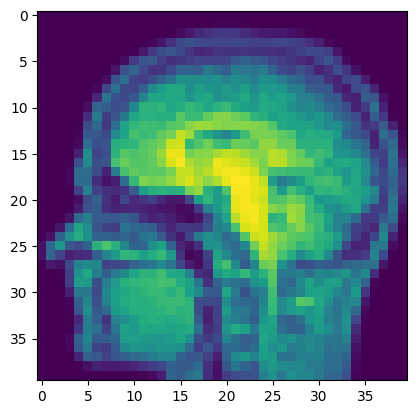

In [107]:
test_ishift = np.fft.ifftshift(test_shift)
test_idft = idft(test_ishift)
plt.imshow(test_idft.real)

**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [115]:
comp_1 = %timeit np.fft.fft2(test_img, norm = "forward")
comp_2 = np.fft.fftshift(comp_1)
comp_3 = np.fft.ifftshift (comp_2)
computer_dft = np.fft.ifft2(comp_3)

np.allclose(test_idft.real,computer_dft.real)

31.9 μs ± 6.95 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


ValueError: not enough values to unpack (expected 2, got 0)

**[Task 4 (f).]()** Round the arrays and compare them again.


In [114]:
np.mean(np.abs(test_idft - computer_dft))

2.478109715668005e-18

**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [116]:
comp_1 = %timeit np.fft.fft2(test_img, norm = "forward")
my = %timeit dft(test_img)

32.6 μs ± 6.08 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
6.31 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
